## 5


/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.1

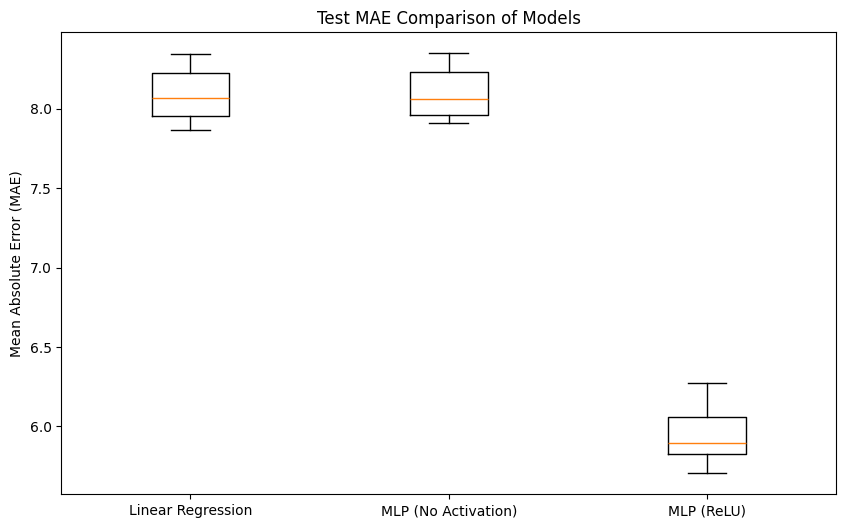

In [5]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model, neural_network
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


#Load Dataset
df = pd.read_csv("parkinsons.csv")
X = df.drop(columns="target")
y = df["target"]


mae_regr = []
mae_mlp = []
mae_mlp_with_activation = []
accuracies = []

for i in range(1,11):
    # Split data into training and test sets using different random states
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Models
    regr = linear_model.LinearRegression()
    regr.fit(X_train,y_train)
    regr_pred = regr.predict(X_test)
    mae_regr.append(mean_absolute_error(y_test,regr_pred))

    mlp = neural_network.MLPRegressor(hidden_layer_sizes=(10,10), activation="identity", random_state=0)
    mlp.fit(X_train,y_train)
    mlp_pred = mlp.predict(X_test)
    mae_mlp.append(mean_absolute_error(y_test,mlp_pred))

    mlp_with_activation = neural_network.MLPRegressor(hidden_layer_sizes=(10,10),activation="relu", random_state=0)
    mlp_with_activation.fit(X_train,y_train)
    mlp_with_activation_pred = mlp_with_activation.predict(X_test)
    mae_mlp_with_activation.append(mean_absolute_error(y_test,mlp_with_activation_pred))

avg_regr = np.mean(mae_regr)
avg_mlp = np.mean(mae_mlp)
avg_mlp_with_activation = np.mean(mae_mlp_with_activation)

# Create a boxplot of the test MAE for each model
plt.figure(figsize=(10, 6))
plt.boxplot([mae_regr, mae_mlp, mae_mlp_with_activation], labels=['Linear Regression', 'MLP (No Activation)', 'MLP (ReLU)'])
plt.title('Test MAE Comparison of Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()


## 6
